In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("Customer Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Replace the blanks with 0 as tenure is Zero and no total charges are recorded

In [7]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.isnull().sum().sum()

np.int64(0)

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [21]:
df["customerID"].duplicated().sum()

np.int64(0)

## converted 0 and 1 values of sioner citizen to yes/no to make it easier to understand

In [23]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

In [26]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


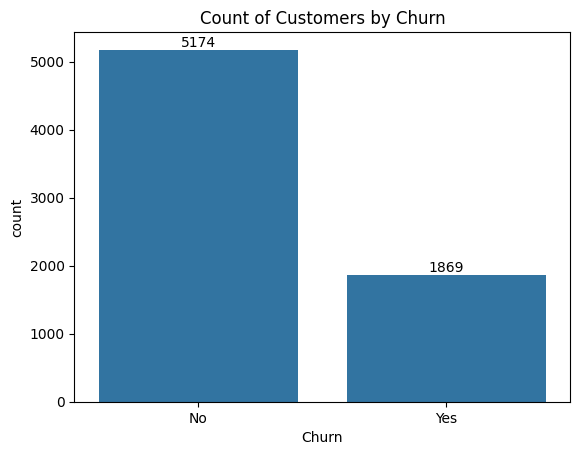

In [41]:
ax = sns.countplot(x = 'Churn', data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

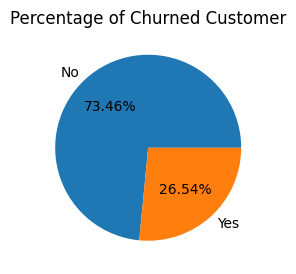

In [42]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})

plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customer")
plt.show()

## from the given pie chart we can conclude that 26.54% of our customers have churned out.


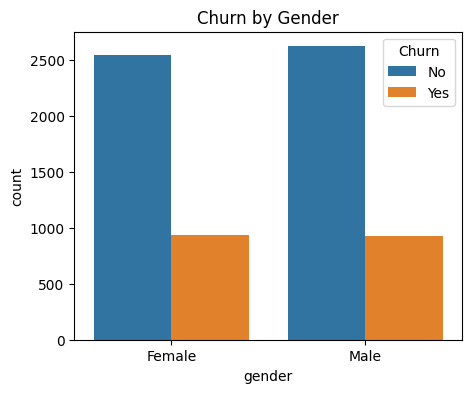

In [48]:
plt.figure(figsize = (5,4))

sns.countplot(x = "gender", data = df, hue= "Churn")
plt.title("Churn by Gender")
plt.show()

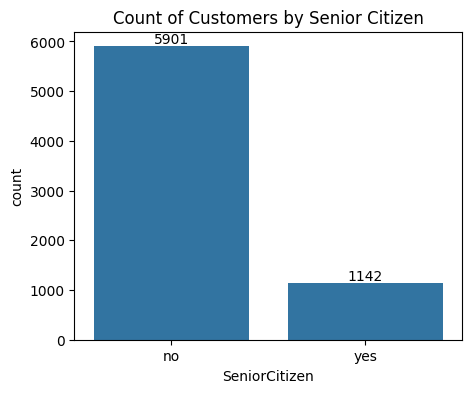

In [55]:
plt.figure(figsize = (5,4))

ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label (ax.containers[0])
plt.title("Count of Customers by Senior Citizen")
plt.show()

## comparative a greater percentage of people in sinior citizen category have churned

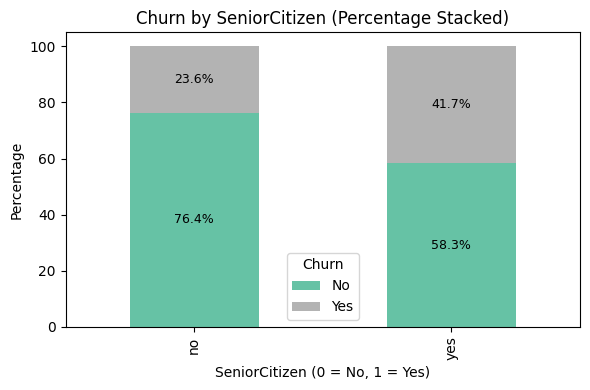

In [50]:
# Step 1: Create a crosstab of SeniorCitizen vs Churn
ct = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Step 2: Convert counts to percentages row-wise (relative to total of each SeniorCitizen group)
ct_percent = ct.div(ct.sum(axis=1), axis=0) * 100

# Step 3: Plot
ax = ct_percent.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='Set2')

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=9, color='black')

# Final touches
plt.title("Churn by SeniorCitizen (Percentage Stacked)")
plt.ylabel("Percentage")
plt.xlabel("SeniorCitizen (0 = No, 1 = Yes)")
plt.legend(title="Churn")
plt.tight_layout()
plt.show()

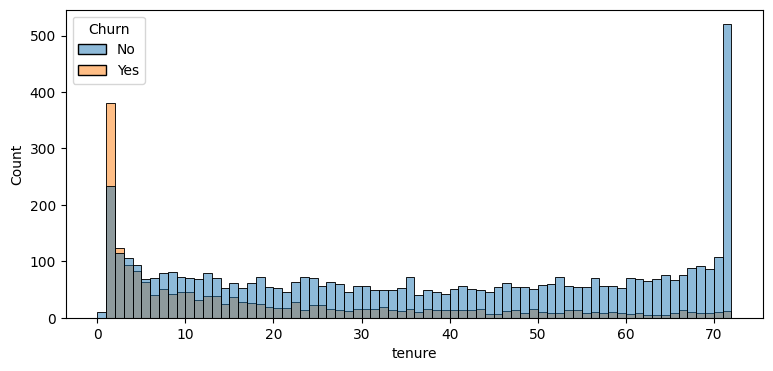

In [60]:
plt.figure(figsize = (9,4))

sns.histplot(x= "tenure", data = df, bins= 72, hue = "Churn")
plt.show()

## people who have used our services for long time have stayed and people who used our services for 1 or 2 months have chruned

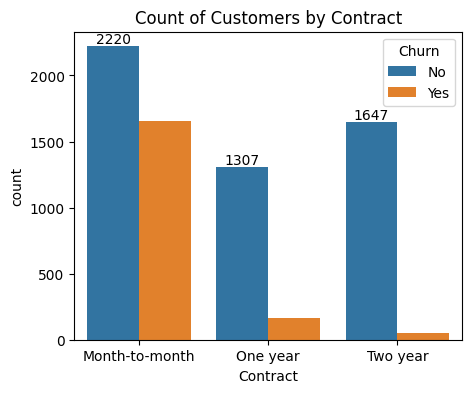

In [62]:
plt.figure(figsize = (5,4))

ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
ax.bar_label (ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

## people who have month to month contract are likely to chern than from those who have 1 or 2 years of contract

In [63]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

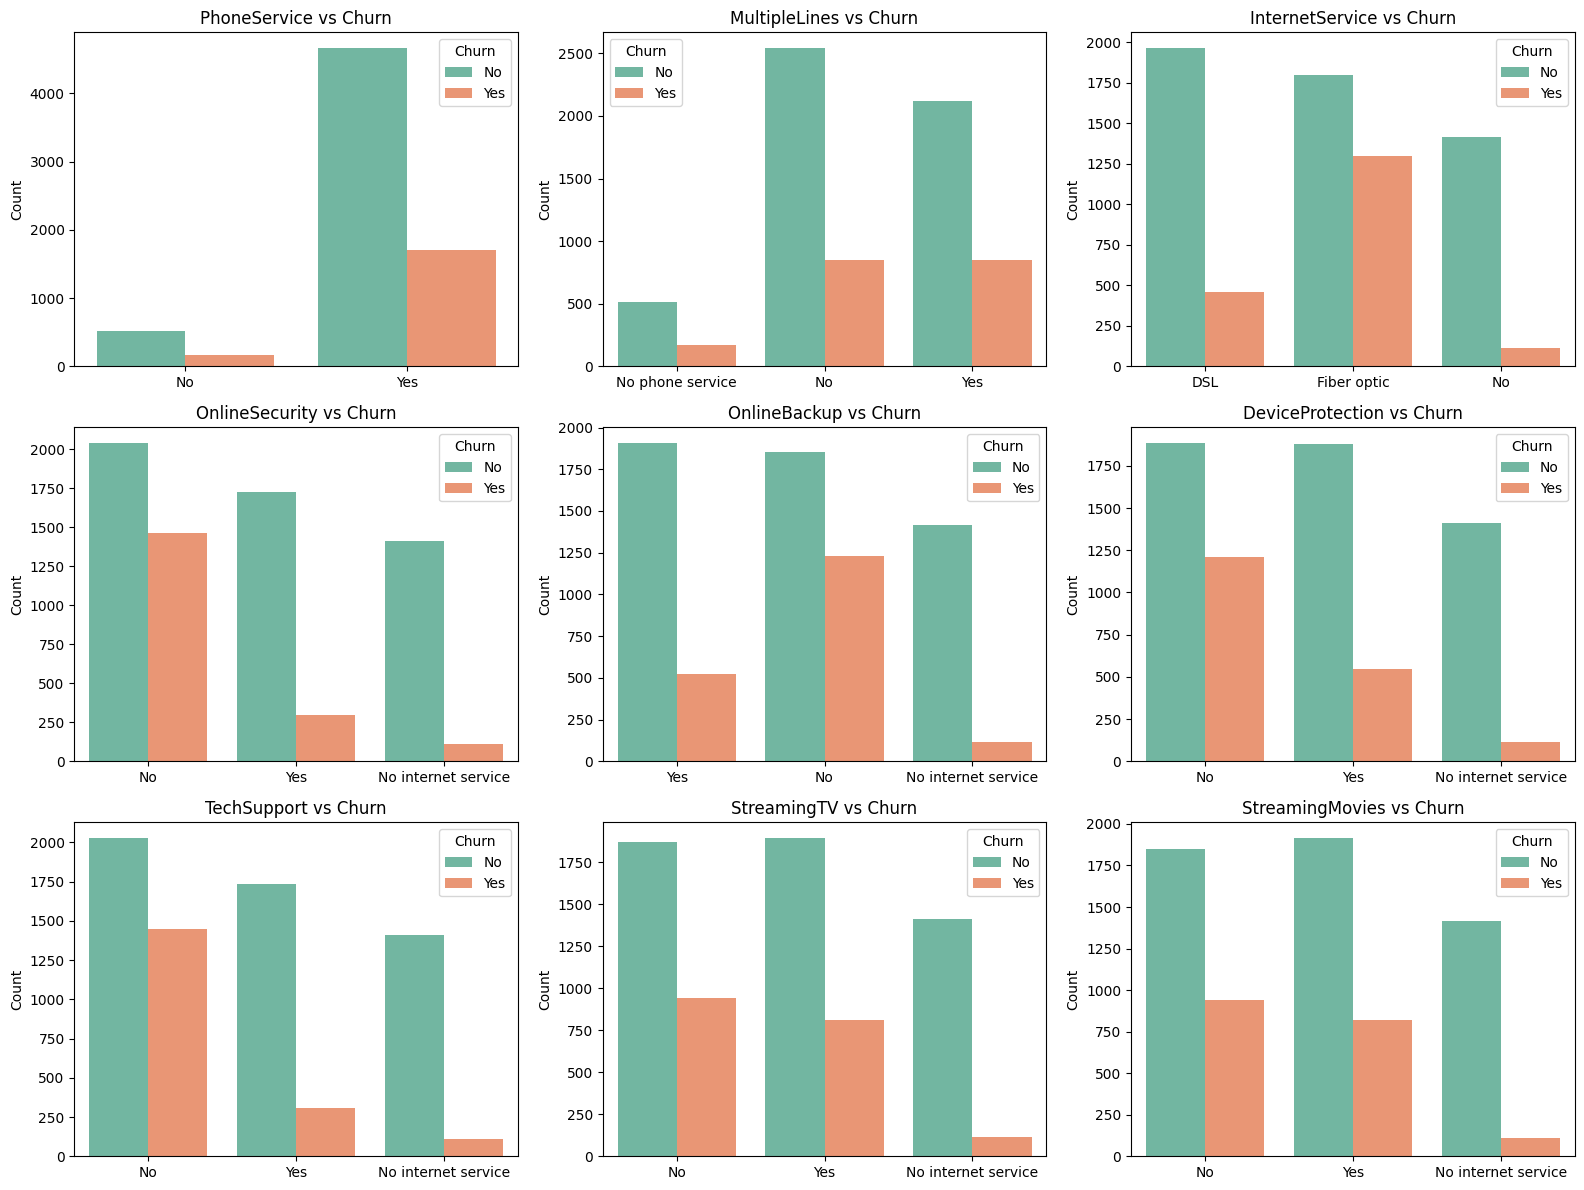

In [70]:

# List of service-related columns
service_cols = ['PhoneService', 'MultipleLines', 'InternetService',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up subplot grid (e.g., 3 rows x 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axes = axes.flatten()  # Flatten 2D axes array to 1D for easy iteration

# Plot each column
for i, col in enumerate(service_cols):
    sns.countplot(x=col, data=df, ax=axes[i], palette="Set2", hue="Churn")
    axes[i].set_title(f"{col} vs Churn")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].legend(title="Churn")

# Remove any unused subplots (if any)
for j in range(len(service_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Customers who lacked additional services (like OnlineSecurity, TechSupport, and DeviceProtection) showed higher churn rates compared to those who used them. In contrast, customers with Fiber optic internet or multiple streaming services also exhibited relatively higher churn. Notably, churn was low among customers with PhoneService and OnlineBackup, suggesting these features may contribute to retention.

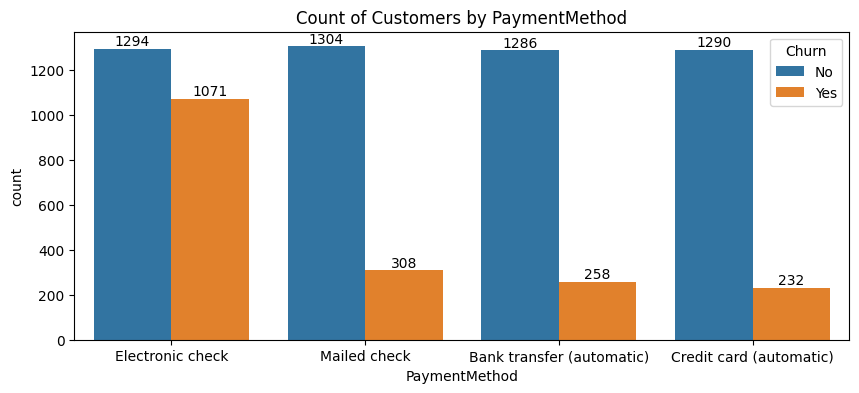

In [73]:
plt.figure(figsize = (10,4))

ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label (ax.containers[0])
ax.bar_label (ax.containers[1])
plt.title("Count of Customers by PaymentMethod")
plt.show()

## customers are likely to churn when they are using electronic check as a payment method.